# Create HDF5 files

The scripts below create .hdf5 files from several input files.

##  To create a hdf5 file

In [ ]:
import h5py
import numpy as np
import imageio 


path = '/home/user1/Desktop/full_stack/microglia4_stack4_325_2048x2048/'
file_name = 'microglia4_stack4_325_2048x2048_grayscale_maps.hdf5'


png_files = glob.glob(path + '*.png')

print("ck 2")

png_files.sort()
print("ck 3")
images = [imageio.imread(i) for i in png_files] # loading all the images in the directory
print("ck 4")
#print(images)
print("ck 5")

images = np.array(images) #images have to be numpy arrays
print("ck 6")

with h5py.File(path + file_name, 'w') as f:
  f.create_dataset('raw', data=images, compression='gzip')

print("created file!")



## To create a hdf5 file from a directory with png images 


In [ ]:
import h5py
import numpy as np
import imageio 


path = '/home/user1/Desktop/Masks/tiffs/Full_Morfologies_copies/microglia4_groundtruth/training_data'
size = 150
file_name = '/microglia4_2048x2048_' + str(size) + '_groundtruth_stack_'
image_number = 1200

png_files = glob.glob(path + '/' + '*.png')

print("ck 2")

png_files.sort()
print("ck 3")

images = imageio.imread(png_files[0])
b = np.array(images)

#print(b)

y=1 # y is the image counter
stack=1
flag=True
for i in png_files:
    if y==1:
        y=y+1
        b = imageio.imread(i)
        b = np.array(images)
        continue
    images = imageio.imread(i)
    images = np.array(images)
    b=np.dstack((b, images))
    #print (y)
    if y==size:
        with h5py.File(path + file_name  + str(stack) + '.hdf5', 'w') as f:
            f.create_dataset('stack', data=b, compression='gzip')
            print("stack no: " + str(stack))
            stack = stack+1
            
            if y*(stack-1)==image_number:
                break
            
            y=0
    
    y=y+1

#images = [imageio.imread(i) for i in png_files]
print("ck 4")
print(b.shape)
print("ck 5")




## To check the shape of a hdf5 file
It is very important check that files used as groundtruth and grayscale-maps have the same shape

In [ ]:

import h5py
import numpy as np
import imageio 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


images_vol = imageio.volread('/home/user1/Desktop/Masks/tiffs/Full_Morfologies_copies/microglia4_groundtruth/Microglia4.tif','tif')
print(images_vol.shape)
print("loaded")

## To display an image of a .hdf5 file

loaded
['stack']
hdf5 shape = (500, 500, 500)
uint8
done


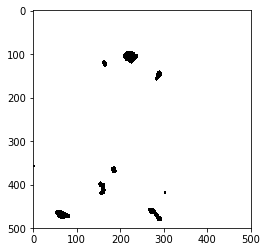

In [21]:


import h5py
import numpy as np
import imageio 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


path = '/home/user1/Desktop/full_stack/all_labels_500x500x500_cubes/groundtruth_uint8/'
file_name = 'all_labels_groundtruth_1_6_6_'

h = h5py.File(path + file_name + '.hdf5', 'r')
print('loaded')
print(list(h.keys()))
dset = h['stack']

    
print('hdf5 shape = ' + str(dset.shape))

single_image = dset[470,:,:]
print(single_image.dtype)
imgplot = plt.imshow(single_image, cmap='gray', vmin=0, vmax=255 )
    
print("done")

## To create several hdf5 files from a stack of images 
The masks of manually segmentation from Fiji are normally stacks of images which format is .tif. This script allows to create several .hdf5 files from a single .tif stack.

**Note:** The background of the groundtruth files must be white whole the segmentation musb be plotted in grayscale.

In [ ]:


import h5py
import numpy as np
import imageio 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

input_path = '/home/user1/Desktop/full_stack'
file_name = 'Allabels.tif'

data_set = imageio.volread( input_path + '/' + file_name ,'tif')

output_path = '/home/user1/Desktop/full_stack/all_labels_500x500x500_cubes/groundtruth/'

size=500
layers=3   #3
raws=8     #8
columns=8  #8

for l in range(layers):
    for i in range(raws):
        for j in range(columns):
            current_cube = data_set[l*size:l*size+size, i*size:i*size+size , j*size:j*size+size] #images [ y axis ] [ x axis ] limit
            
            #inverting black and white pixels
            for k in range(len(current_cube)):
                (thresh, current_cube[k] ) = cv2.threshold(current_cube[k], 0, 255, cv2.THRESH_BINARY_INV)
                
            file_name = 'all_labels_groundtruth_' + str(l) + '_' + str(i) + '_' + str(j) + '_' 
            with h5py.File(output_path + file_name  +  '.hdf5', 'w') as g:
                g.create_dataset('stack', data=current_cube, compression='gzip')
            
print('cubes created')
    


## To create several .hdf5 files from a bigger hdf5 file 

In [6]:


import h5py
import numpy as np
import imageio 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


input_path = '/home/user1/Desktop/full_stack/all_labels_500x500x500_cubes/groundtruth/'
file_name = 'all_labels_groundtruth_'


output_path = '/home/user1/Desktop/full_stack/all_labels_500x500x500_cubes/groundtruth_uint8/'

size=500
layers=3   #3
raws=8     #8
columns=8  #8

for l in range(layers):
    for i in range(raws):
        for j in range(columns):
            line = str(l) + '_' + str(i) + '_' + str(j) + '_'
            h = h5py.File(input_path + file_name + line + '.hdf5', 'r')
            dset = h['stack']
            dset = np.uint8(dset)
            with h5py.File(output_path + file_name  + line + '.hdf5', 'w') as g:
                g.create_dataset('stack', data=dset, compression='gzip')
            
print('cubes created')

cubes created
